
<br>
============================<br>
Local Histogram Equalization<br>
============================<br>
This example enhances an image with low contrast, using a method called *local<br>
histogram equalization*, which spreads out the most frequent intensity values<br>
in an image.<br>
The equalized image [1]_ has a roughly linear cumulative distribution function<br>
for each pixel neighborhood.<br>
The local version [2]_ of the histogram equalization emphasized every local<br>
graylevel variations.<br>
These algorithms can be used on both 2D and 3D images.<br>
References<br>
----------<br>
.. [1] https://en.wikipedia.org/wiki/Histogram_equalization<br>
.. [2] https://en.wikipedia.org/wiki/Adaptive_histogram_equalization<br>


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank

In [3]:
matplotlib.rcParams['font.size'] = 9

In [4]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.
    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    return ax_img, ax_hist, ax_cdf

Load an example image

In [5]:
img = img_as_ubyte(data.moon())

Global equalize

In [6]:
img_rescale = exposure.equalize_hist(img)

Equalization

In [7]:
selem = disk(30)
img_eq = rank.equalize(img, selem=selem)

Display results

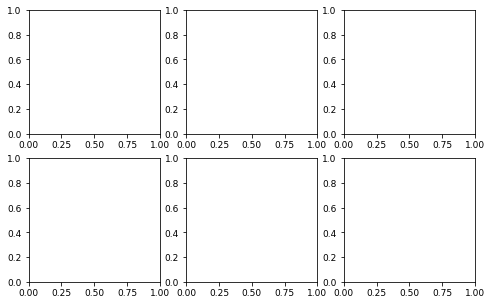

In [8]:
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

In [9]:
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

Text(3.1999999999999957, 0.5, 'Number of pixels')

In [10]:
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

Text(0.5, 1.0, 'Global equalise')

In [11]:
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')

Text(0, 0.5, 'Fraction of total intensity')

prevent overlap of y-axis labels

In [12]:
fig.tight_layout()

####################################################################<br>
<br>
3D Equalization<br>
===============<br>
<br>
3D Volumes can also be equalized in a similar fashion.<br>
Here the histograms are collected from the entire 3D image, but<br>
only a single slice is shown for visual inspection.

In [13]:
matplotlib.rcParams['font.size'] = 9

In [14]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.
    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display Slice of Image
    ax_img.imshow(image[0], cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    return ax_img, ax_hist, ax_cdf

Load an example image

In [15]:
img = img_as_ubyte(data.brain())

ModuleNotFoundError: The requested file is part of the scikit-image distribution, but requires the installation of an optional dependency, pooch. To install pooch, use your preferred python package manager. Follow installation instruction found at https://scikit-image.org/docs/stable/install.html

Global equalization

In [ ]:
img_rescale = exposure.equalize_hist(img)

Local equalization

In [ ]:
neighborhood = ball(3)
img_eq = rank.equalize(img, selem=neighborhood)

Display results

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])

In [ ]:
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

In [ ]:
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalize')

In [ ]:
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')

prevent overlap of y-axis labels

In [ ]:
fig.tight_layout()
plt.show()